In [1]:
# 한글 폰트 깨지는것을 막아줌 (windows)
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 필요한 패키지 및 라이브러리

In [38]:
import pandas as pd 
import numpy as np

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

# 스케일링 (PCA, preprocessing)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.rc('axes', unicode_minus=False)

In [207]:
df = pd.read_csv("편의시설 변경 버전.csv", encoding='cp949')

In [208]:
df

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,패스트푸드,편의점,마트_x,음식점_x,헬스시설2,법정동명_추출,술집,음식점_y,마트_y,CCTV수
0,청운동,0,7,2,0,0,0,0,0,0,...,0.0,1.0,0.0,11.0,0.0,청운동,0.0,18.0,0.0,36.0
1,신교동,0,0,0,0,0,0,2,0,1,...,0.0,0.0,0.0,6.0,0.0,신교동,0.0,8.0,0.0,16.0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,궁정동,0.0,1.0,0.0,1.0
3,효자동,0,2,1,0,0,0,0,0,1,...,0.0,0.0,0.0,8.0,0.0,효자동,0.0,11.0,0.0,0.0
4,창성동,0,2,2,0,0,0,0,0,0,...,0.0,2.0,0.0,14.0,1.0,창성동,0.0,22.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,둔촌동,3,37,1,6,2,2,9,0,8,...,2.0,19.0,0.0,133.0,10.0,둔촌동,2.0,175.0,0.0,221.0
461,암사동,1,29,3,8,3,2,23,0,22,...,9.0,36.0,2.0,283.0,19.0,암사동,10.0,347.0,2.0,482.0
462,성내동,1,54,3,14,4,4,35,19,34,...,23.0,57.0,4.0,698.0,38.0,성내동,15.0,892.0,4.0,556.0
463,천호동,3,51,3,7,3,5,47,6,37,...,24.0,74.0,4.0,710.0,18.0,천호동,19.0,926.0,4.0,830.0


## 인프라(컬럼) 묶기
### 5개로 묶어보고 점점 디테일하게 바꿔보자!

['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '공원수', '노래방수', '당구장', '음식점수', '장보기시설', '쇼핑시설', '유흥주점', '헬스시설', '다방',
       '커피숍', '패스트푸드', '편의점', '마트']

유흥업소는 많이 없어야 좋은거 아닌가? 나중에 얘만 반대로 생각하자..

치안 : (경찰서, 119안전센터, '치안센터')  
여가 : ('헬스시설', '영화상영관','공원수')  
일반음식점 : ('다방', '커피숍', '패스트푸드','음식점수')  
보건 : ('병원', '약국', '의원')  
편의시설 : ('마트', '편의점')  
대중교통 : ('지하철역', '버스정류소')  

In [209]:
df['치안'] = df['경찰서'] + df['119안전센터'] + df['치안센터'] + df['CCTV수']
df['여가'] = df['헬스시설2'] +  df['영화상영관']
df['카페'] = df['다방'] + df['커피숍']
df['일반음식점'] = df['음식점_y'] + df['패스트푸드']
df['보건'] = df['병원'] + df['약국'] + df['의원']
df['편의시설'] = df['마트_y'] + df['편의점']
df['대중교통'] = df['지하철역'] + df['버스정류소']
df['술집'] = df['술집'] + df['유흥주점']

In [210]:
df = df[['법정동명','치안','여가', '일반음식점','보건','편의시설','대중교통', '카페', '술집']]
# df = df[['법정동명','일반음식점','보건','편의시설','대중교통', '카페', '술집']]
# df = df[['법정동명','치안','여가','일반음식점','보건','편의시설','지하철역', '버스정류소', '카페']]
df

,법정동명,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집
0,청운동,36.0,0.0,18.0,0,1.0,7,8.0,0.0
1,신교동,17.0,0.0,8.0,1,0.0,0,1.0,0.0
2,궁정동,2.0,0.0,1.0,0,0.0,1,1.0,0.0
3,효자동,0.0,0.0,11.0,0,0.0,2,4.0,0.0
4,창성동,2.0,1.0,22.0,4,2.0,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...
460,둔촌동,223.0,10.0,177.0,34,19.0,40,35.0,2.0
461,암사동,485.0,19.0,356.0,92,38.0,30,65.0,12.0
462,성내동,559.0,57.0,915.0,170,61.0,55,129.0,18.0
463,천호동,834.0,24.0,950.0,205,78.0,54,122.0,34.0


In [211]:
df1 = df.drop(axis=1, columns=['법정동명'])

qcut으로 각 컬럼별로 데이터를 5개의 클래스로 나누기

In [212]:
for col in df1.columns:
    df1[col] = df1[col].astype(int)

In [213]:
df2 = df1
df2

,치안,여가,일반음식점,보건,편의시설,대중교통,카페,술집
0,36,0,18,0,1,7,8,0
1,17,0,8,1,0,0,1,0
2,2,0,1,0,0,1,1,0
3,0,0,11,0,0,2,4,0
4,2,1,22,4,2,2,2,0
...,...,...,...,...,...,...,...,...
460,223,10,177,34,19,40,35,2
461,485,19,356,92,38,30,65,12
462,559,57,915,170,61,55,129,18
463,834,24,950,205,78,54,122,34


In [214]:
df = df[['법정동명','치안','여가', '일반음식점','보건','편의시설','대중교통', '카페', '술집']]

In [215]:
df2['술집'] = pd.qcut(df1['술집'], 2, labels=[1, 2])

In [216]:
df2['여가'] = pd.qcut(df1['여가'], 3, labels=[1, 2, 3], duplicates='drop')
df2['치안'] = pd.qcut(df1['치안'], 3, labels=[1, 2, 3])
df2['일반음식점'] = pd.qcut(df1['일반음식점'], 3, labels=[1, 2, 3])
df2['보건'] = pd.qcut(df1['보건'], 3, labels=[1, 2, 3])
df2['편의시설'] = pd.qcut(df1['편의시설'], 3, labels=[1, 2, 3])
# df2['지하철역'] = pd.qcut(df1['지하철역'], 2, labels=[1, 2])
# df2['패스트푸드'] = pd.qcut(df1['패스트푸드'], 5, labels=[1, 2, 3, 4, 5])
df2['대중교통'] = pd.qcut(df1['대중교통'], 3, labels=[1, 2, 3])
df2['카페'] = pd.qcut(df1['카페'], 3, labels=[1, 2, 3])
# df2['술집'] = pd.qcut(df1['술집'], 4, labels=[1, 2, 3, 4])

MinMaxScaler는 이상하게나옴.
StandardScaler 해보자.

# Std

In [223]:
df_standard = StandardScaler().fit_transform(df2)
df_standard = pd.DataFrame(df_standard)
df_standard.describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.22,-0.95,-1.22,-1.16,-1.09,-1.16,-1.15,-0.95
25%,-1.22,-0.95,-1.22,-1.16,-1.09,-1.16,-1.15,-0.95
50%,0.01,0.18,0.00,0.04,0.09,0.04,0.04,-0.95
75%,1.23,1.32,1.22,1.24,1.26,1.23,1.24,1.06
max,1.23,1.32,1.22,1.24,1.26,1.23,1.24,1.06


# MinMax

In [229]:
df_standard = MinMaxScaler().fit_transform(df2)
df_standard = pd.DataFrame(df_standard)
df_standard.describe().round(2)

,0,1,2,3,4,5,6,7
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.50,0.42,0.50,0.48,0.46,0.48,0.48,0.47
std,0.41,0.44,0.41,0.42,0.43,0.42,0.42,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


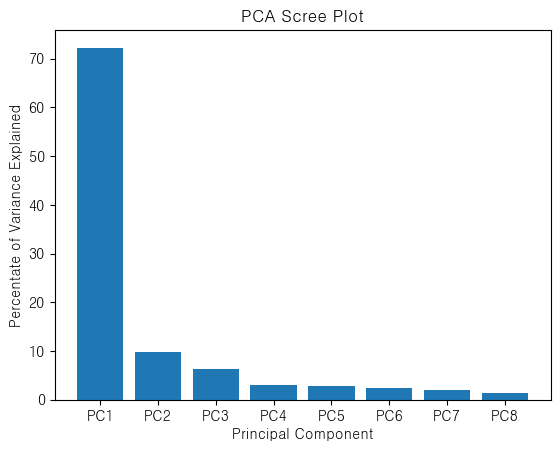

0    0.722645
1    0.820325
2    0.882897
3    0.913190
4    0.942231
5    0.965348
6    0.985186
7    1.000000
dtype: float64

In [230]:
# PCA 주성분분석
pca_test = PCA(random_state=1107)
X_p = pca_test.fit_transform(df_standard)


percent_variance = np.round(pca_test.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
pd.Series(np.cumsum(pca_test.explained_variance_ratio_))

In [231]:
pca = PCA(n_components=3)
pc = pca.fit_transform(df_standard)
pcd = pd.DataFrame(pc)
pcd

,0,1,2
0,-1.025638,-0.282367,-0.314055
1,-1.196298,-0.104473,-0.301300
2,-1.336007,0.026934,0.132940
3,-1.336007,0.026934,0.132940
4,-1.336007,0.026934,0.132940
...,...,...,...
460,1.302564,-0.044476,-0.176369
461,1.482108,-0.015454,-0.089696
462,1.482108,-0.015454,-0.089696
463,1.482108,-0.015454,-0.089696


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import os
os.environ["OMP_NUM_THREADS"] = "2"  # 메모리 누수 해결

D:\User\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


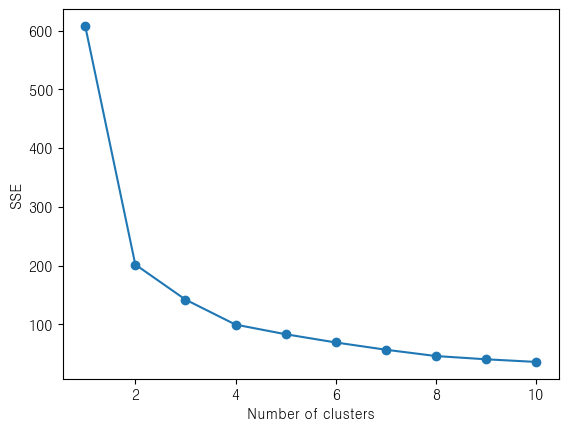

In [232]:
# 엘보우 방법을 사용하여 최적의 K값 탐색
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(pcd)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [269]:
def plot_silhouette(X, num_clusters):
    for n_clusters in num_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        clusterer.fit(X)
        
        silhouette_avg = silhouette_score(X, clusterer.labels_)
        sample_silhouette_values = silhouette_samples(X, clusterer.labels_)
        
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[clusterer.labels_ == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.view_init(elev=10)
        colors = cm.nipy_spectral(clusterer.labels_.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], X[:, 2], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k")
        
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker="o", c="white", alpha=1, s=200, edgecolor="k")
        
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        
        plt.show()
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)


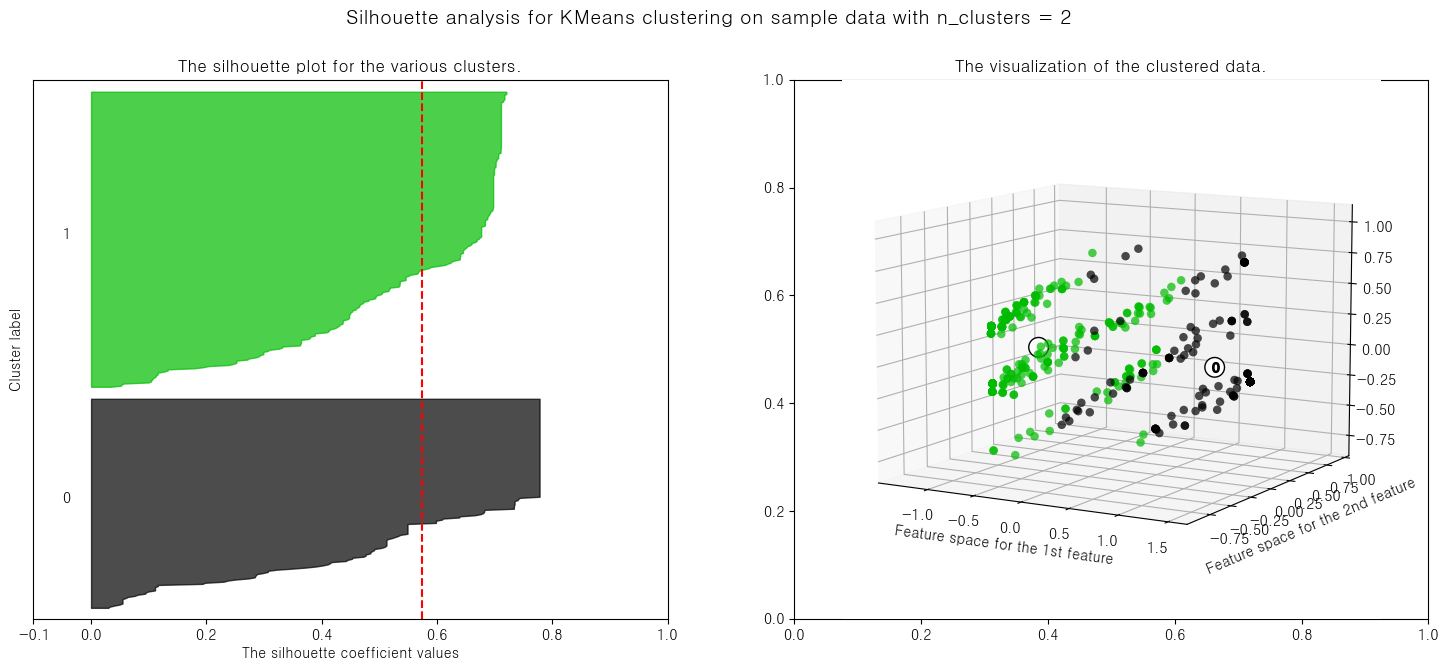

For n_clusters = 2 The average silhouette_score is : 0.5732777326781877


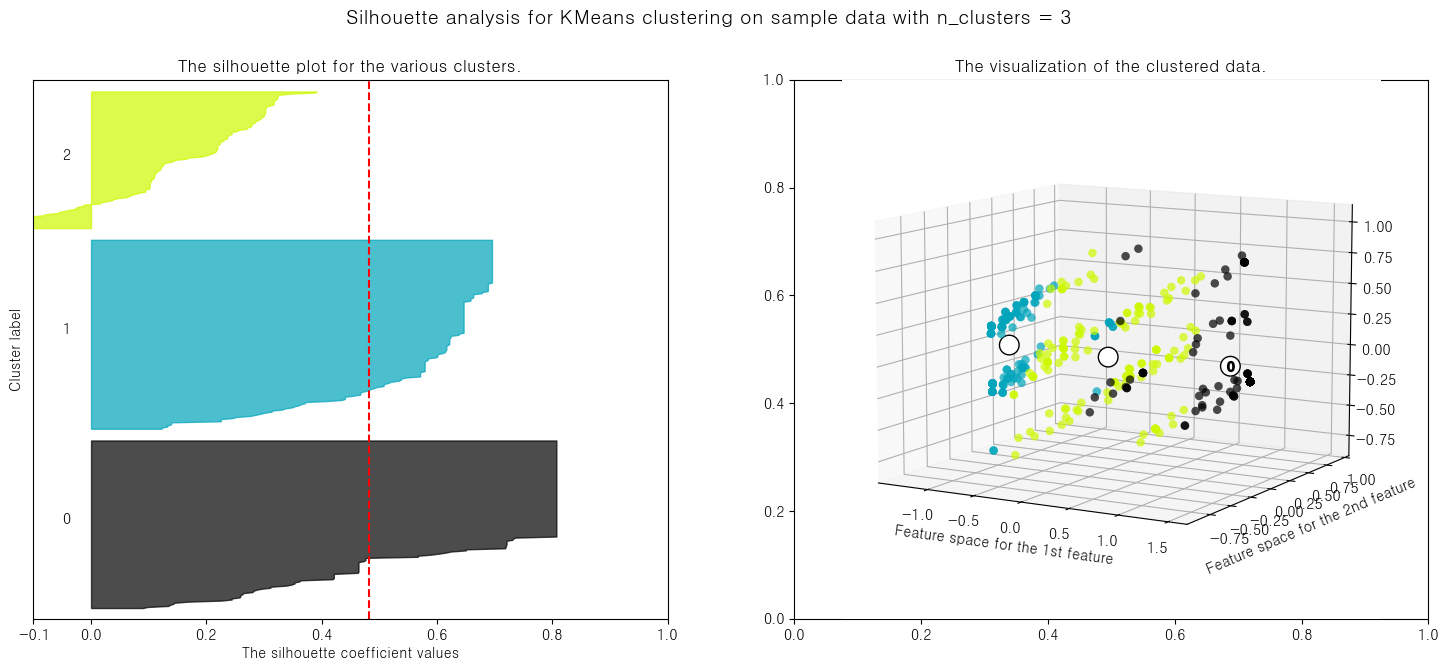

For n_clusters = 3 The average silhouette_score is : 0.48148270682973365


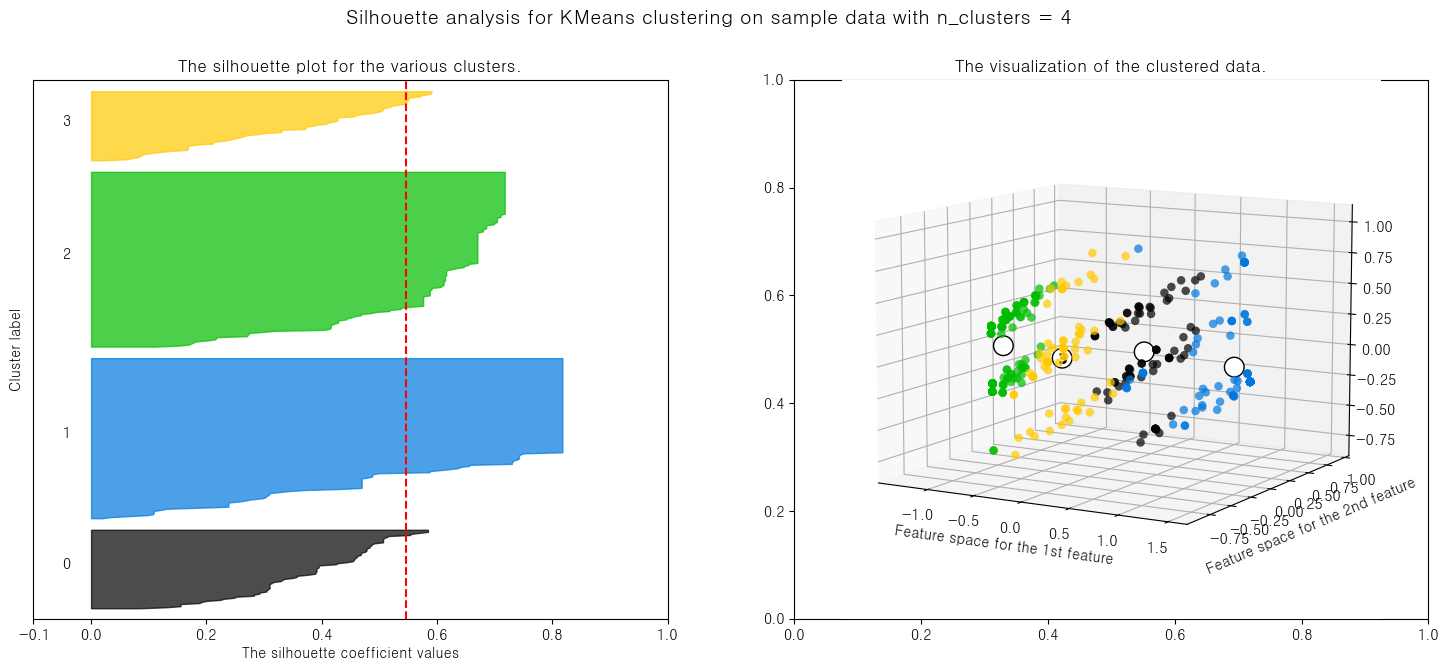

For n_clusters = 4 The average silhouette_score is : 0.5466741076551247


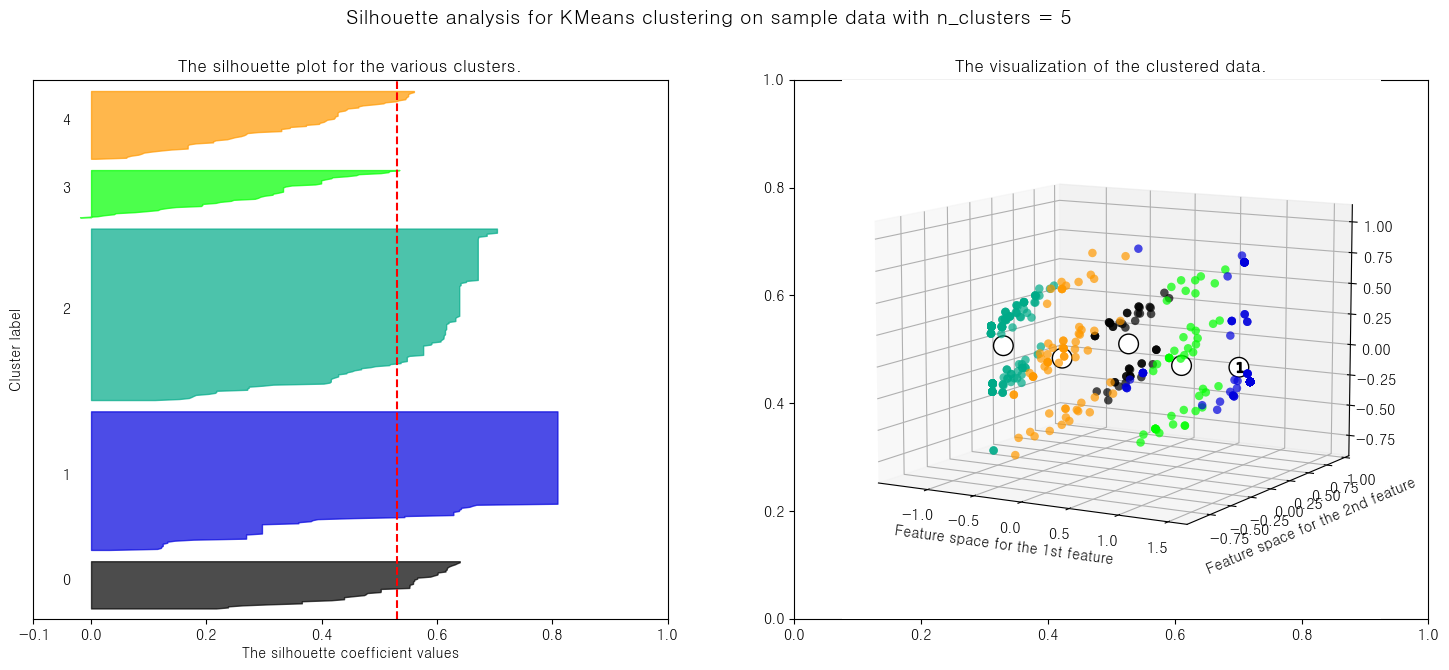

For n_clusters = 5 The average silhouette_score is : 0.5300279807432134


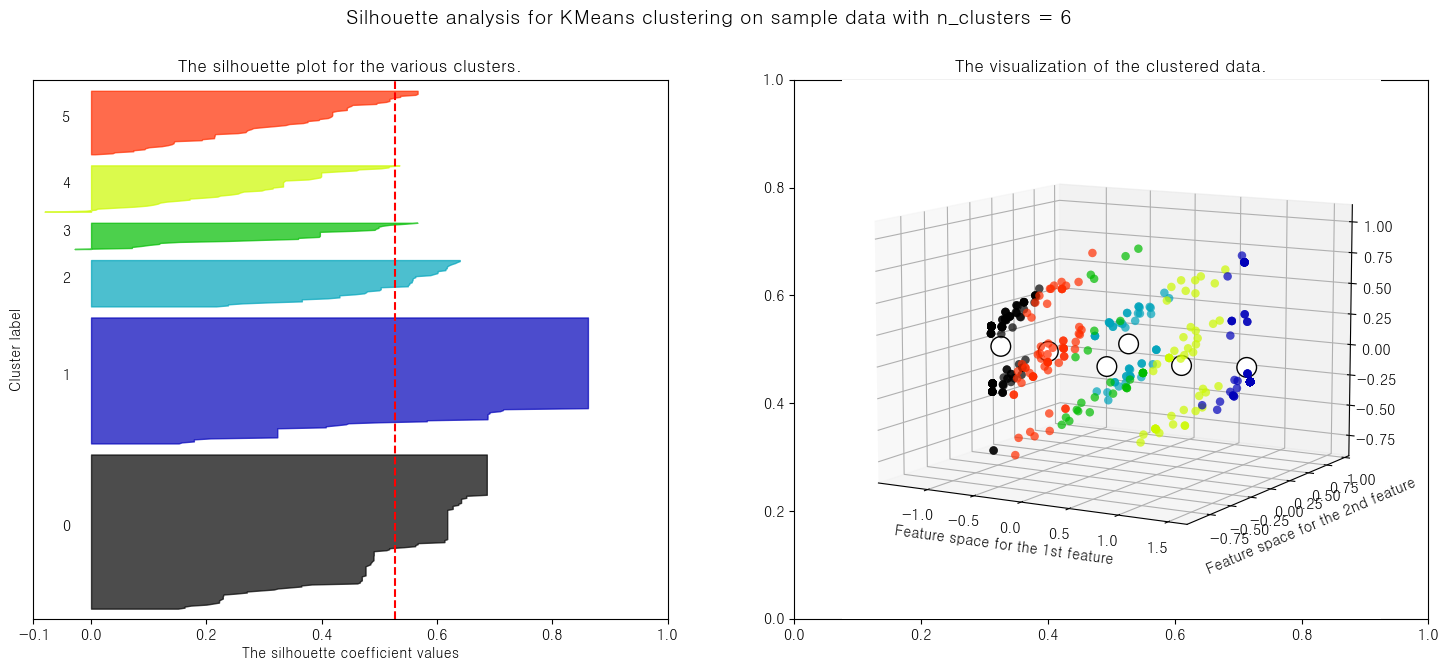

For n_clusters = 6 The average silhouette_score is : 0.5268240514931688


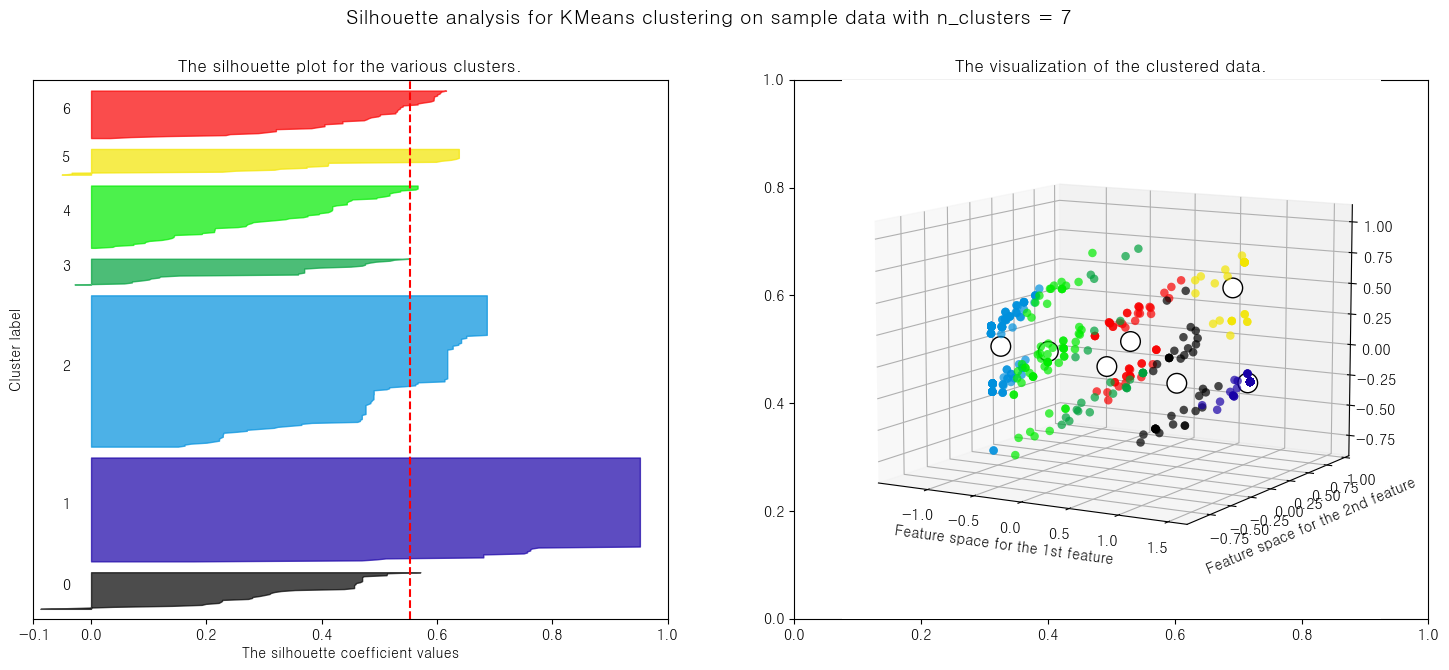

For n_clusters = 7 The average silhouette_score is : 0.553955953561104


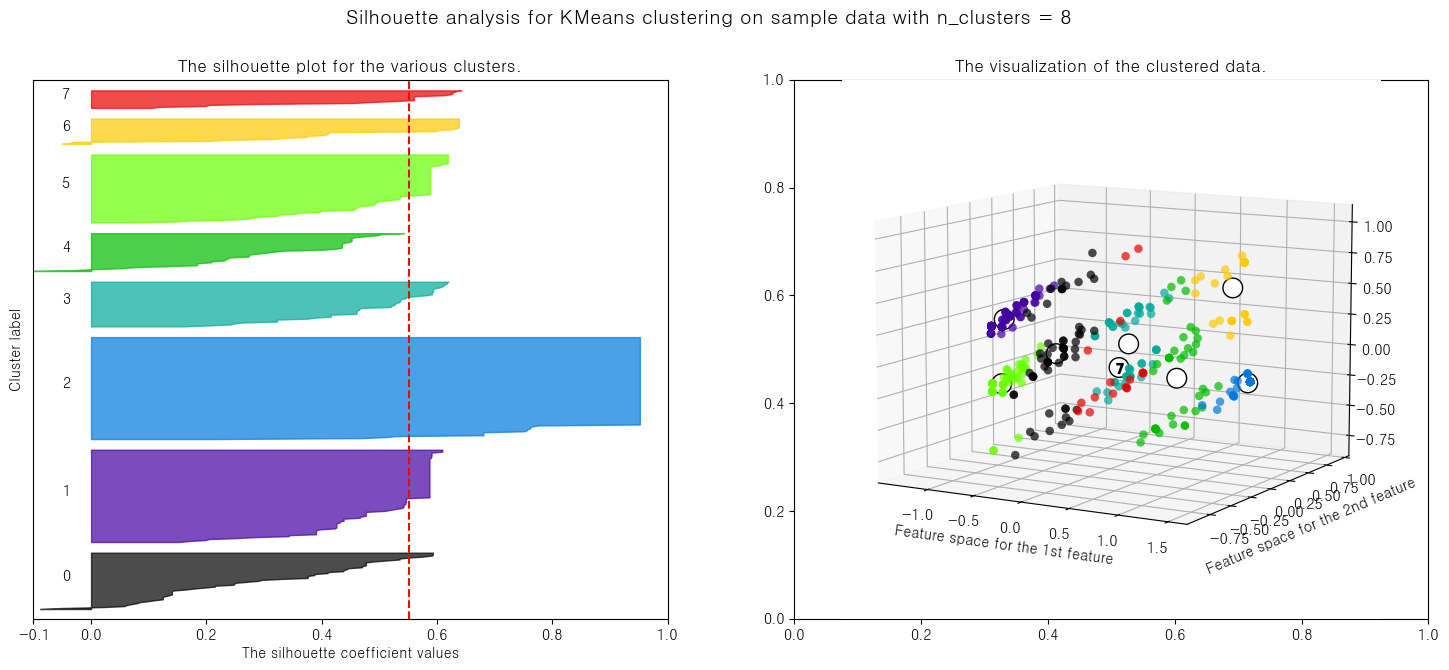

For n_clusters = 8 The average silhouette_score is : 0.5508093682044864


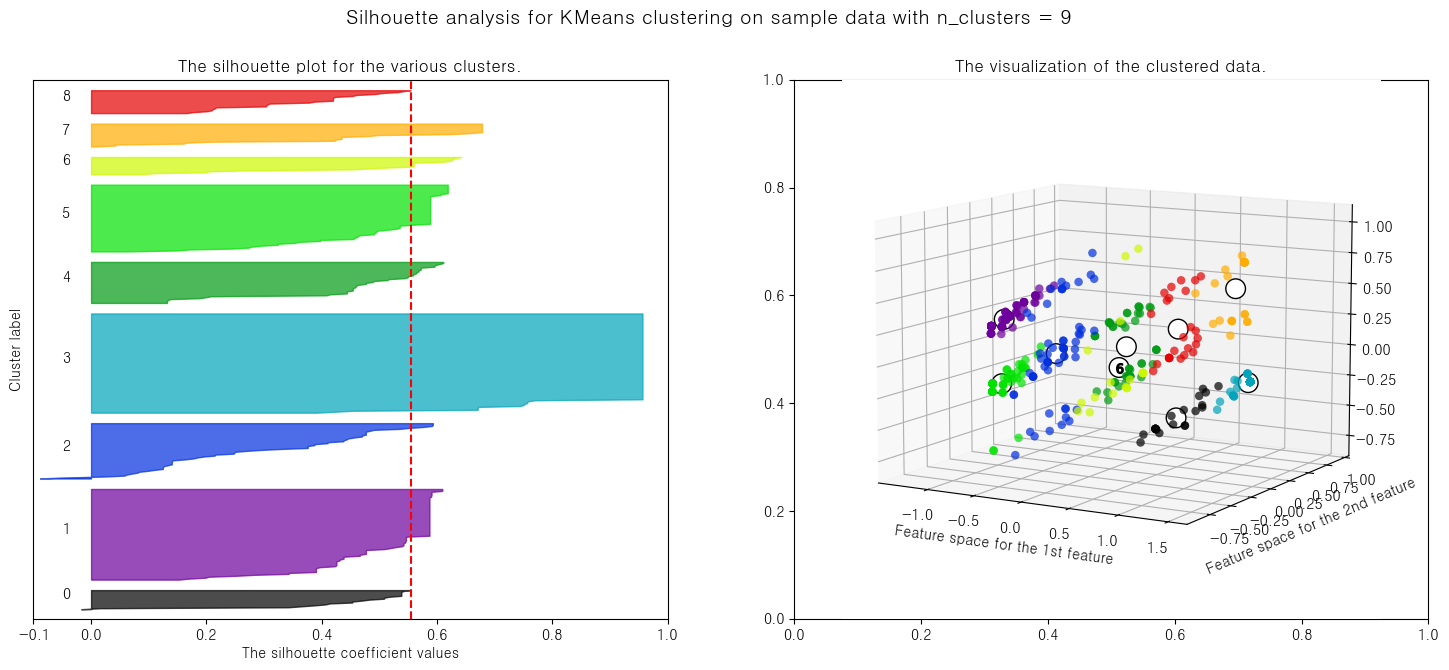

For n_clusters = 9 The average silhouette_score is : 0.5557138693375757


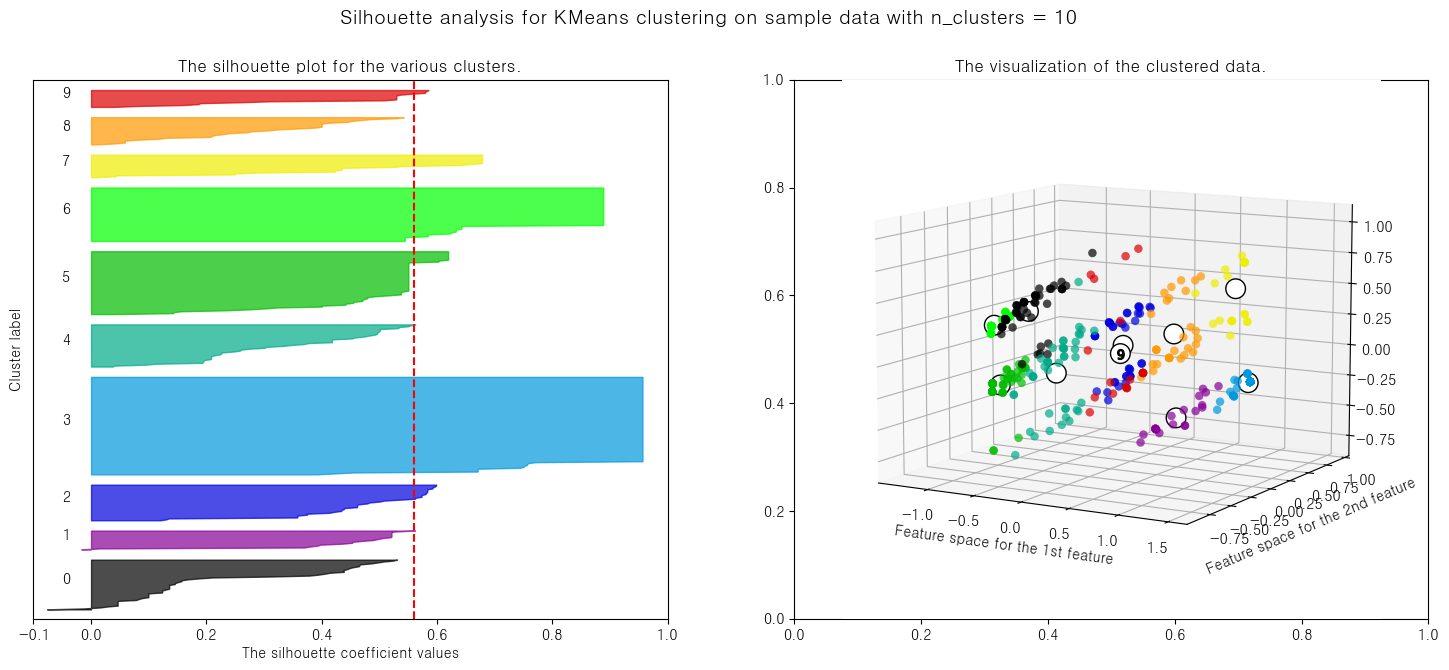

For n_clusters = 10 The average silhouette_score is : 0.5606682333698328


In [270]:
plot_silhouette(pc, [2,3,4,5,6,7,8,9,10])

* 2차원 축소
* min-max
* n = 6, 0.64
* 여가 라벨:2, 나머지 라벨 3

In [46]:
from sklearn.mixture import GaussianMixture

def plot_gmm_cluster(X, num_clusters):
    for n_clusters in num_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        gmm = GaussianMixture(n_components=n_clusters, random_state=10)
        gmm.fit(X)
        cluster_labels = gmm.predict(X)
        
        # Create a subplot with 1 row and 1 column
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(7, 7)
        
        # The Scatter plot of the clustered data
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax.scatter(X[:, 0], X[:, 1], marker='.', s=150, lw=0, alpha=0.8, c=colors, edgecolor='k')
        
        # Labeling the clusters
        centers = gmm.means_
        # Draw white circles at cluster centers
        ax.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
        
        for i, c in enumerate(centers):
            ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
        ax.set_title("The visualization of the clustered data.")
        ax.set_xlabel("Feature space for the 1st feature")
        ax.set_ylabel("Feature space for the 2nd feature")
        
        plt.suptitle(("GMM clustering on sample data with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        
        silhouette_avg = silhouette_score(X, cluster_labels)
        plt.show()
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

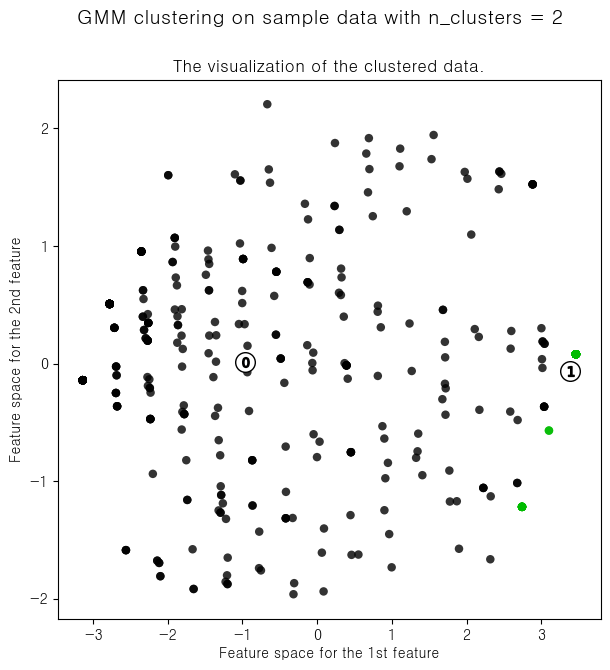

For n_clusters = 2 The average silhouette_score is : 0.480264605837105


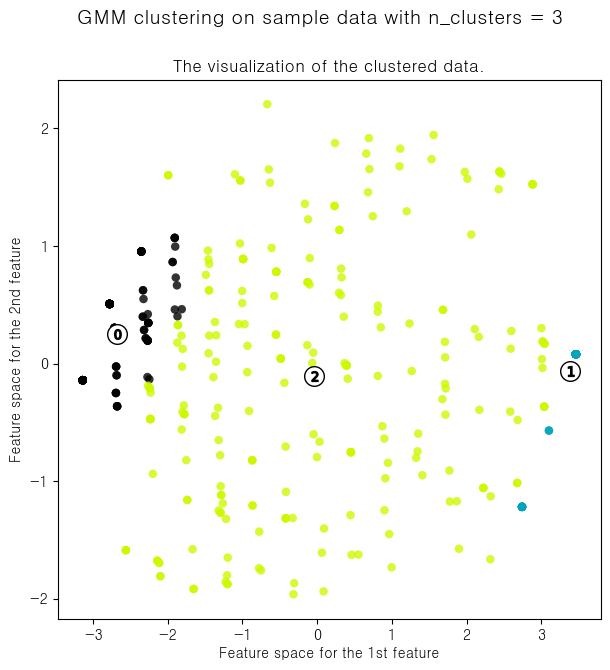

For n_clusters = 3 The average silhouette_score is : 0.364800787777835


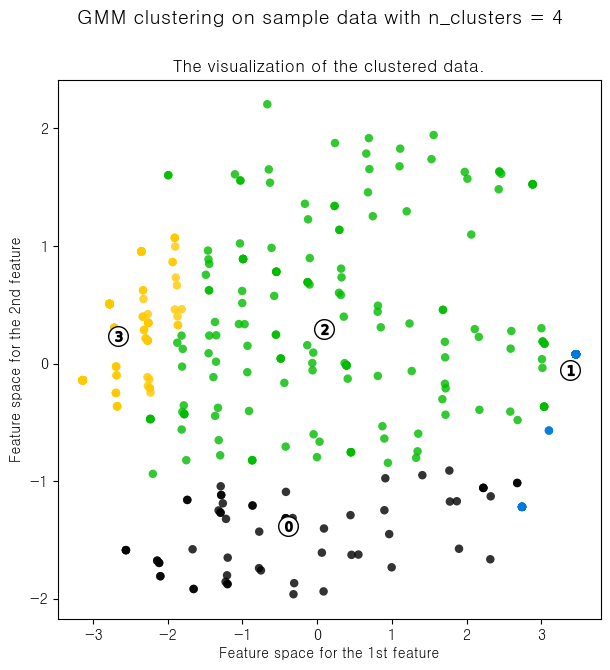

For n_clusters = 4 The average silhouette_score is : 0.40537042006609664


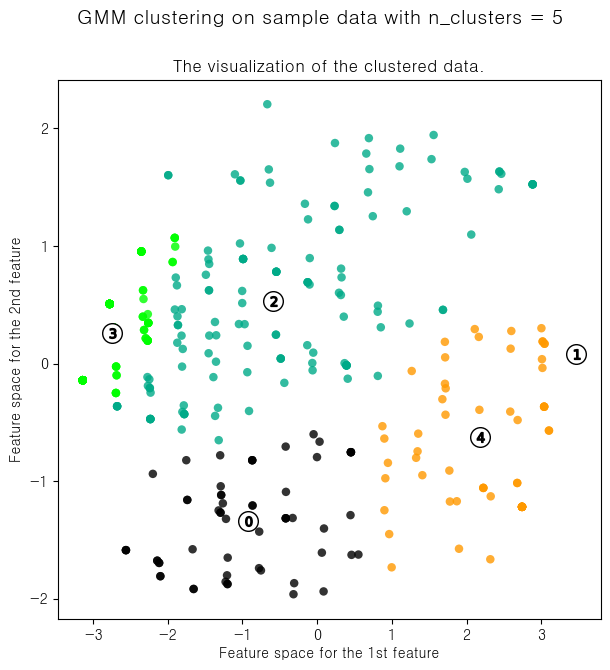

For n_clusters = 5 The average silhouette_score is : 0.43263152303420854


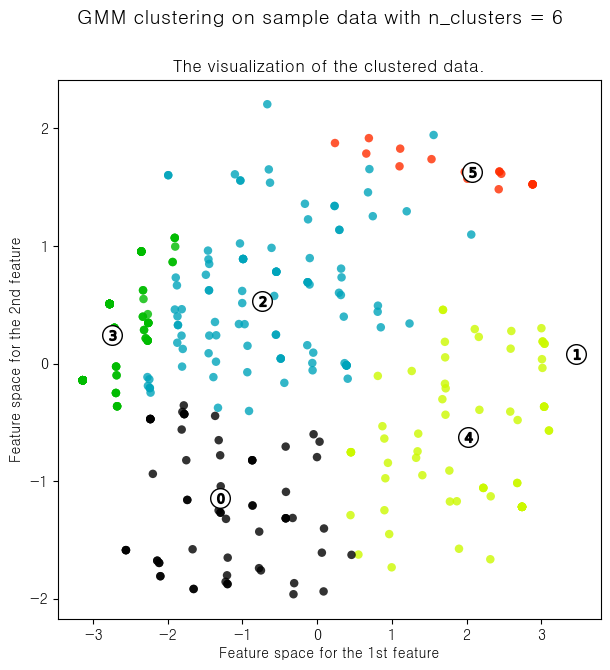

For n_clusters = 6 The average silhouette_score is : 0.47709948332120244


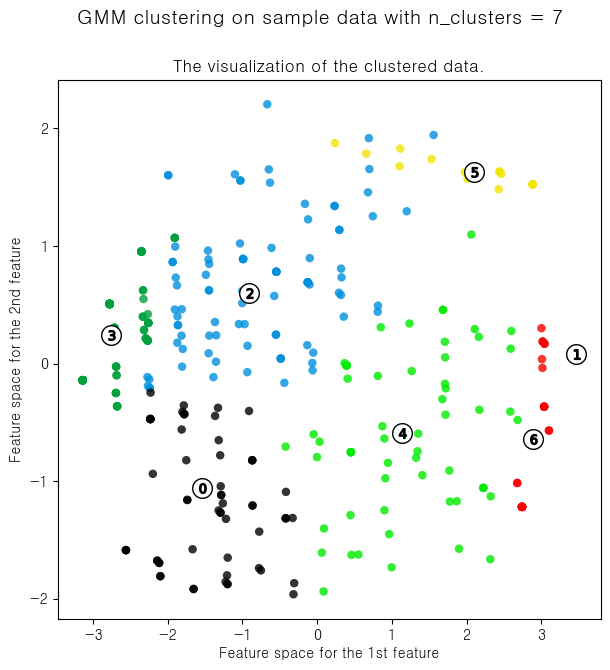

For n_clusters = 7 The average silhouette_score is : 0.4810943489983878


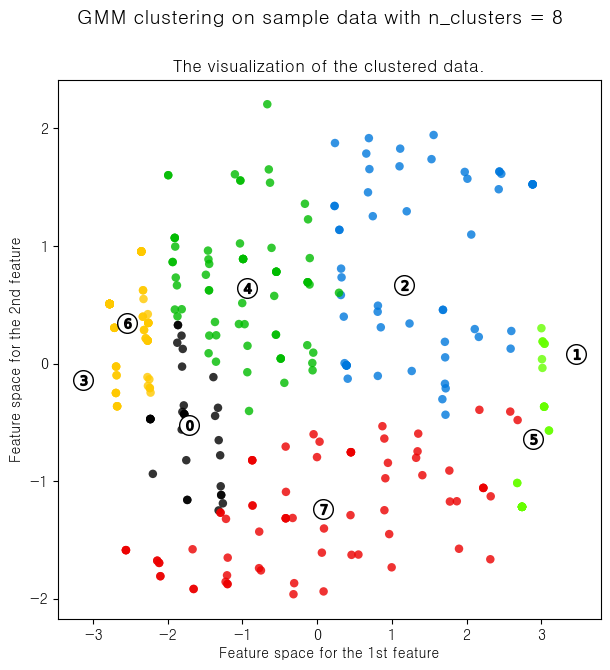

For n_clusters = 8 The average silhouette_score is : 0.4025955019323184


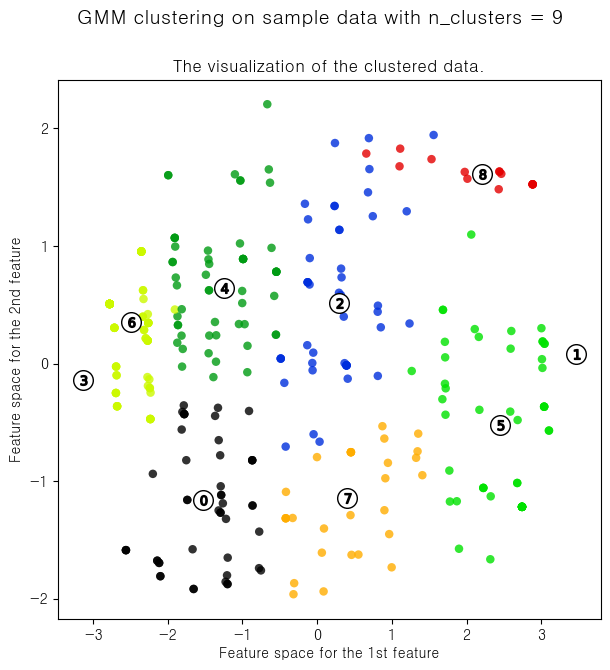

For n_clusters = 9 The average silhouette_score is : 0.47970603650503113


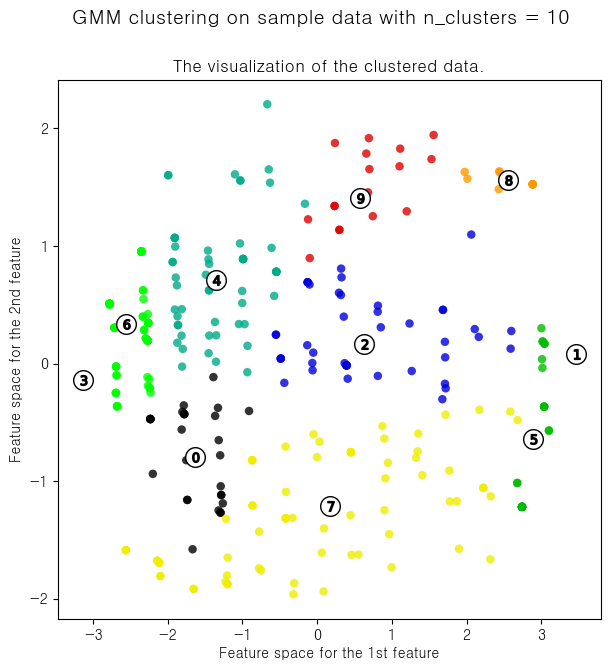

For n_clusters = 10 The average silhouette_score is : 0.4168076784972742


In [228]:
plot_gmm_cluster(pc, [2,3,4,5,6,7,8,9,10])